In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing headbrain csv file having 237 rows and 4 columns
df=pd.read_csv("headbrain.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [15]:
df['Age Range'].unique()   #there are two different values containing 'Age Range'

array([1, 2], dtype=int64)

In [10]:
df.columns.values  # give array of columns name present in dataset

array(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'],
      dtype=object)

In [8]:
df.shape   #describe rows and columns

(237, 4)

In [16]:
#lets check null values present or not
df.isnull().sum()
#no null values present

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

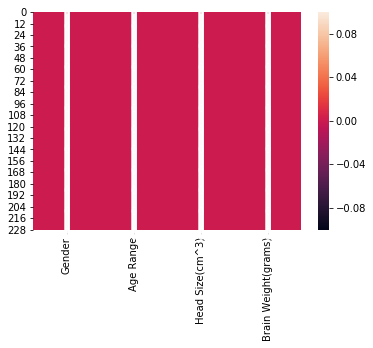

In [17]:
sns.heatmap(df.isnull(),annot=True)
plt.show()
#no null values present

In [20]:
#lets check outlier present or not
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)


(237, 4)
(236, 4)


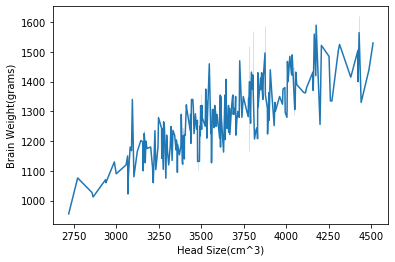

In [21]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)
sns.lineplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

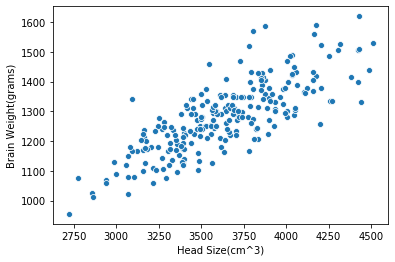

In [22]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)

sns.scatterplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

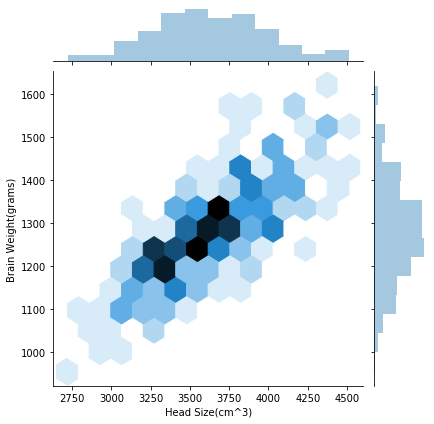

In [27]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)

sns.jointplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1,kind='hex')
plt.show()

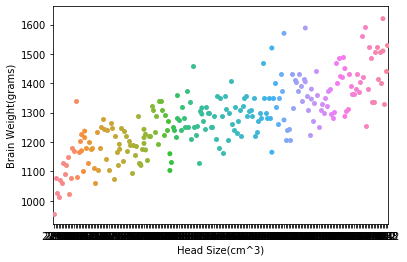

In [24]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)

sns.swarmplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

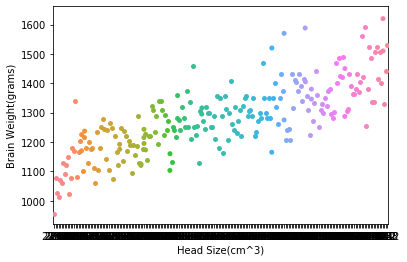

In [25]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)

sns.stripplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

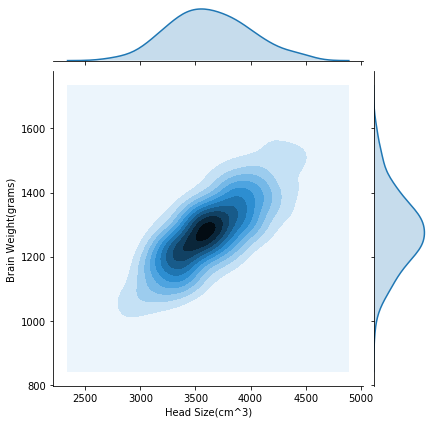

In [30]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)

sns.jointplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1,kind='kde')
plt.show()

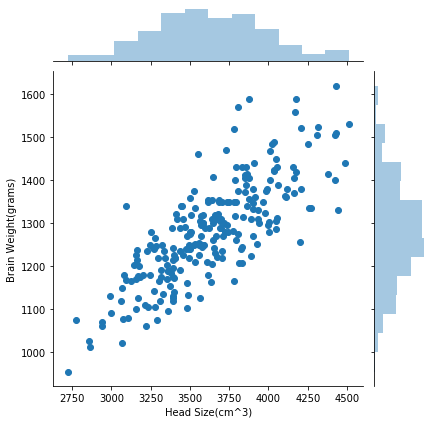

In [31]:
#lets check the brain weight(gram) is changing  with respect to Heat Size(cm^3)

sns.jointplot(x=df1['Head Size(cm^3)'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

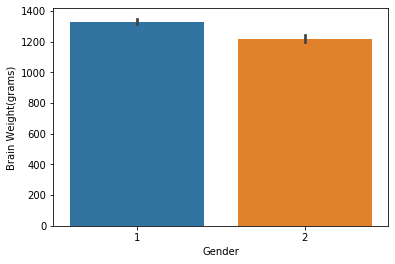

In [32]:
#lets check what is  the average brain size according to gender
sns.barplot(x=df1['Gender'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

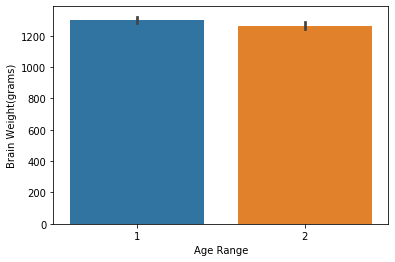

In [33]:
#lets check what is average brain size according to age range
sns.barplot(x=df1['Age Range'],y=df1['Brain Weight(grams)'],data=df1)
plt.show()

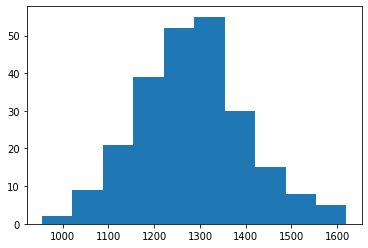

In [34]:
#lets draw histogram for brain weight
plt.hist(x='Brain Weight(grams)',bins=10,data=df1)
plt.show()

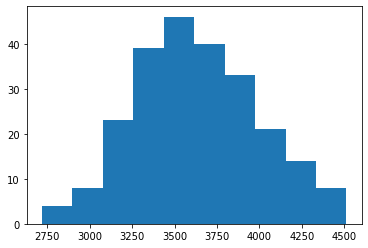

In [35]:
plt.hist(x='Head Size(cm^3)',bins=10,data=df1)
plt.show()

In [36]:
#lets check skewness of dataset
df1.skew()
#no skewness present because all values is less than 0.55

Gender                 0.257959
Age Range             -0.153968
Head Size(cm^3)        0.164767
Brain Weight(grams)    0.205274
dtype: float64

In [48]:
#lets seprate input and output
x=df1['Head Size(cm^3)'].values
y=df1['Brain Weight(grams)'].values

In [49]:
#making x and y in 2D array
x.shape

(236,)

In [50]:
x=x.reshape(-1,1)
x.shape

(236, 1)

In [51]:
y.shape

(236,)

In [52]:
y=y.reshape(-1,1)
y.shape

(236, 1)

In [53]:
#Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x=scx.fit_transform(x)
x


array([[ 2.46589809],
       [ 0.30372296],
       [ 1.7647276 ],
       [ 0.41266977],
       [ 1.53007294],
       [-0.12368375],
       [ 0.43501784],
       [-0.19631495],
       [-0.04546553],
       [ 0.9853389 ],
       [-0.52036187],
       [ 1.01606748],
       [ 0.02995919],
       [ 1.61667168],
       [ 0.56631271],
       [ 0.68922706],
       [-0.36951244],
       [-0.45611119],
       [-1.49250262],
       [ 2.22006939],
       [ 0.69481407],
       [ 1.1641234 ],
       [ 0.48809449],
       [ 0.22550474],
       [ 2.21727589],
       [ 1.13618832],
       [ 1.09707921],
       [-0.48963328],
       [ 1.52448592],
       [ 0.44060485],
       [ 0.46574642],
       [ 1.32335335],
       [ 1.48537681],
       [ 1.47699629],
       [ 0.51602957],
       [-0.28570721],
       [ 0.33165804],
       [-0.82485423],
       [-0.38347998],
       [ 0.92946874],
       [-0.34716438],
       [ 1.91557703],
       [ 0.48809449],
       [ 0.65291145],
       [ 1.13060131],
       [ 1

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2_scr=r2_score(y_test,predlr)
    print("r2_score corrosponding to random state :",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print("max r2 score corrosponding to:",final_r_state," is ",max_r_score)
#at random state 52, r2 score is maximum that is 78%     

r2_score corrosponding to random state : 42  is:  0.5160439339209708
r2_score corrosponding to random state : 43  is:  0.7390820760256583
r2_score corrosponding to random state : 44  is:  0.5359704407099068
r2_score corrosponding to random state : 45  is:  0.7179743617057047
r2_score corrosponding to random state : 46  is:  0.6374863798560535
r2_score corrosponding to random state : 47  is:  0.6392680441660814
r2_score corrosponding to random state : 48  is:  0.6706309006045819
r2_score corrosponding to random state : 49  is:  0.7637633745880882
r2_score corrosponding to random state : 50  is:  0.588690940616982
r2_score corrosponding to random state : 51  is:  0.46387290649671487
r2_score corrosponding to random state : 52  is:  0.7814049973715858
r2_score corrosponding to random state : 53  is:  0.6693035417585758
r2_score corrosponding to random state : 54  is:  0.6180044907461557
r2_score corrosponding to random state : 55  is:  0.6798377247483111
r2_score corrosponding to random s

In [56]:
#lets do the cross validation--- to check model is overfitting or underfitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()
a_score
#no underfitting and overfitting

0.4734555277018046

In [57]:
#apply ensemble technique to boost the result
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=52)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
pred=rf.predict(x_test)
print(pred)
print("Mean r2 score for Random Forest Regressor: ",cross_val_score(rf,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Random Forest Regressor :",cross_val_score(rf,x,y,cv=5,scoring="r2").std())

0.8614817189467796
[1199.         1542.4        1192.75       1304.8        1345.
 1353.7        1144.5        1262.5        1192.75       1325.8
 1306.         1225.2        1542.4        1365.2        1344.5
 1409.7        1301.8        1320.         1324.7        1301.8
 1064.8        1143.9        1334.81666667 1341.1        1274.61666667
 1196.9        1400.8        1122.1        1445.6        1121.5
 1113.5        1237.4        1407.6        1191.         1278.
 1145.3        1389.86666667 1143.9        1400.8        1121.5
 1197.6        1415.7        1529.         1196.9        1214.
 1372.         1323.5        1189.7       ]
Mean r2 score for Random Forest Regressor:  0.274942130916779
Standard deviation in r2 score for Random Forest Regressor : 0.2369648743265323


In [58]:
#now finalize the model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)



In [60]:
#lets evaluate RMSE and r2 score using sklearn lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,predlr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score is:  0.7814049973715858
RMSE is : 68.89244340028148


In [61]:
#lets save the model
from sklearn.externals import joblib
#save file as pickle
joblib.dump(lr,'headbrain.pkl')

['headbrain.pkl']